In [1]:
import os
import shutil
import datetime
from dateutil import relativedelta
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import cm
%matplotlib inline

In [2]:
ROOT = Path("./")
DATA = ROOT/'data'
# [f for f in ROOT.iterdir()]
# [f for f in DATA.iterdir()]

print('ROOT =', ROOT)
print('DATA =', DATA)

ROOT = .
DATA = data


In [3]:
%ls {DATA}

 Volume in drive C has no label.
 Volume Serial Number is FCBC-A9FB

 Directory of C:\Users\laura\covid-19\covid-19_analysis_NC\data

01/08/2021  08:20 PM    <DIR>          .
01/08/2021  08:20 PM    <DIR>          ..
01/07/2021  10:10 PM        15,318,162 MECK_COVID_Cases_Restricted_Detailed_12312020.csv
01/08/2021  06:56 PM             8,024 weekly_covid19_report_mecknc.csv
               2 File(s)     15,326,186 bytes
               2 Dir(s)  289,960,759,296 bytes free


### 0. Reading File

In [4]:
df = pd.read_csv(DATA/'MECK_COVID_Cases_Restricted_Detailed_12312020.csv')
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55801 entries, 0 to 55800
Data columns (total 32 columns):
race_ethnicity_combined    55645 non-null object
current_status             55801 non-null object
cdc_case_earliest_dt       55801 non-null object
cdc_report_dt              55801 non-null object
sex                        55767 non-null object
onset_dt                   22927 non-null object
pos_spec_dt                55784 non-null object
hosp_yn                    55801 non-null object
icu_yn                     55801 non-null object
death_yn                   55801 non-null object
hc_work_yn                 55586 non-null object
pna_yn                     55801 non-null object
abxchest_yn                55801 non-null object
acuterespdistress_yn       55801 non-null object
mechvent_yn                55801 non-null object
fever_yn                   55801 non-null object
sfever_yn                  55801 non-null object
chills_yn                  55801 non-null object
myalgia_y

In [5]:
df.head()

,race_ethnicity_combined,current_status,cdc_case_earliest_dt,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,mechvent_yn,fever_yn,sfever_yn,chills_yn,myalgia_yn,runnose_yn,sthroat_yn,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-06-10,2020-06-10,Female,2020-06-10,2020-06-12,No,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,No,37119.0,Mecklenburg,NC,20 - 29 Years
1,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-07-28,2020-07-28,Female,NaN,2020-07-28,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years
2,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-08-13,2020-08-13,Female,NaN,2020-08-13,No,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years
3,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-11-12,2020-11-12,Female,NaN,2020-11-12,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years
4,"Asian, Non-Hispanic",Laboratory-confirmed case,2020-09-04,2020-09-04,Female,NaN,2020-09-04,Unknown,Unknown,No,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,20 - 29 Years


In [6]:
# df.name.unique()
df.res_state.unique()

array(['NC'], dtype=object)

In [7]:
df['death_yn'].value_counts()

No         55238
Yes          544
Missing       18
Unknown        1
Name: death_yn, dtype: int64

In [8]:
#     df.loc[(df['original_description'].str.contains('amzn')) & (df['original_description'].str.contains('mktp')), ['category']] = 'general_merchandise'
## locating rows with 'death_yn' that contains 'yes'
deaths = df.loc[(df['death_yn'].str.contains('Yes'))]
deaths.head()


,race_ethnicity_combined,current_status,cdc_case_earliest_dt,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,mechvent_yn,fever_yn,sfever_yn,chills_yn,myalgia_yn,runnose_yn,sthroat_yn,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
5057,"White, Non-Hispanic",Laboratory-confirmed case,2020-04-16,2020-04-16,Female,NaN,2020-04-16,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Missing,Yes,Unknown,Yes,Yes,Missing,Yes,Yes,Yes,No,Yes,Missing,Yes,Yes,37119.0,Mecklenburg,NC,60 - 69 Years
5491,Hispanic/Latino,Laboratory-confirmed case,2020-11-18,2020-11-18,Male,2020-11-18,2020-11-23,Yes,Unknown,Yes,No,Unknown,Unknown,Unknown,Missing,Unknown,Yes,Yes,Unknown,Missing,Unknown,Yes,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,70 - 79 Years
5499,Hispanic/Latino,Laboratory-confirmed case,2020-11-14,2020-11-14,Male,2020-11-14,2020-11-17,Yes,Unknown,Yes,No,Yes,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Yes,Yes,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,70 - 79 Years
5529,"Black, Non-Hispanic",Laboratory-confirmed case,2020-11-03,2020-11-01,Female,2020-11-03,2020-11-01,Yes,Yes,Yes,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Yes,Unknown,Unknown,Missing,Unknown,Unknown,37119.0,Mecklenburg,NC,70 - 79 Years
5533,"Black, Non-Hispanic",Laboratory-confirmed case,2020-11-13,2020-11-13,Female,NaN,2020-11-13,Yes,Unknown,Yes,Missing,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,Unknown,Yes,37119.0,Mecklenburg,NC,70 - 79 Years


In [9]:
# death by age
dba = df.groupby(['age_group','death_yn'])['death_yn'].count().unstack().fillna(0).reset_index()
#dba.index.rename('index', inplace=True)
dba['total'] = dba[['Missing', 'No', 'Unknown', 'Yes']].sum(axis=1)
dba

death_yn,age_group,Missing,No,Unknown,Yes,total
0,0 - 9 Years,1.0,2904.0,0.0,0.0,2905.0
1,10 - 19 Years,4.0,5715.0,0.0,0.0,5719.0
2,20 - 29 Years,8.0,13493.0,1.0,2.0,13504.0
3,30 - 39 Years,2.0,10749.0,0.0,3.0,10754.0
4,40 - 49 Years,0.0,8701.0,0.0,22.0,8723.0
5,50 - 59 Years,1.0,7015.0,0.0,46.0,7062.0
6,60 - 69 Years,1.0,3800.0,0.0,70.0,3871.0
7,70 - 79 Years,1.0,1754.0,0.0,145.0,1900.0
8,80+ Years,0.0,1091.0,0.0,256.0,1347.0


In [10]:
deaths['age_group'].value_counts(normalize=True)

80+ Years        0.470588
70 - 79 Years    0.266544
60 - 69 Years    0.128676
50 - 59 Years    0.084559
40 - 49 Years    0.040441
30 - 39 Years    0.005515
20 - 29 Years    0.003676
Name: age_group, dtype: float64

In [11]:
deaths['age_group'].value_counts()

80+ Years        256
70 - 79 Years    145
60 - 69 Years     70
50 - 59 Years     46
40 - 49 Years     22
30 - 39 Years      3
20 - 29 Years      2
Name: age_group, dtype: int64

In [12]:
deaths.groupby(['age_group','medcond_yn'])['medcond_yn'].count().unstack()

medcond_yn,No,Unknown,Yes
age_group,,,
20 - 29 Years,NaN,2.0,NaN
30 - 39 Years,NaN,NaN,3.0
40 - 49 Years,4.0,9.0,9.0
50 - 59 Years,1.0,19.0,26.0
60 - 69 Years,1.0,29.0,40.0
70 - 79 Years,2.0,47.0,96.0
80+ Years,11.0,91.0,154.0


In [13]:
import seaborn as sns

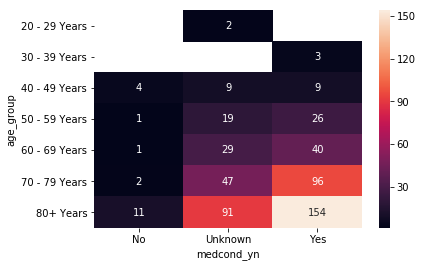

In [14]:
ax = sns.heatmap(deaths.groupby(['age_group','medcond_yn'])['medcond_yn'].count().unstack(), annot=True, fmt='.4g')